# Analisa Nilai Ujian
   
   
Project akhir pelatihan Python, dataset nilai ujian matematika, membaca, dan menulis.  
Berisi kolom jenis kelamin, kelas, level pendidikan, parameter kesiapan ujian seperti makan siang, persiapan belajar, dan hasil ujian matematika, membaca, dan menulis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('dataset/nilai_ujian.csv')
df.head()

,jenis_kelamin,kelas,level_pendidikan,makan_siang,persiapan_belajar,nilai matematika,nilai membaca,nilai menulis
0,laki-laki,kelas A,campuran,normal,ya,67,67,63
1,perempuan,kelas B,SMP,mengurangi/sedikit,tidak,40,59,55
2,laki-laki,kelas C,SMA,mengurangi/sedikit,tidak,59,60,50
3,laki-laki,kelas D,SMA,normal,tidak,77,78,68
4,laki-laki,kelas E,diploma,normal,ya,78,73,68


In [3]:
df.rename(columns = {'nilai matematika' : 'mtk', 'nilai membaca' : 'baca',
                     'nilai menulis' : 'nulis', 'persiapan_belajar' : 'persiapan',
                     'level_pendidikan' : 'pendidikan'}, inplace = True)

for row in df.itertuples():
    df.at[row.Index, "kelas"] = df.at[row.Index, "kelas"][-1]
    
df.head()

,jenis_kelamin,kelas,pendidikan,makan_siang,persiapan,mtk,baca,nulis
0,laki-laki,A,campuran,normal,ya,67,67,63
1,perempuan,B,SMP,mengurangi/sedikit,tidak,40,59,55
2,laki-laki,C,SMA,mengurangi/sedikit,tidak,59,60,50
3,laki-laki,D,SMA,normal,tidak,77,78,68
4,laki-laki,E,diploma,normal,ya,78,73,68


In [4]:
df['mean_nilai'] = round(df[['mtk', 'baca', 'nulis']].mean(axis=1), 2)
df.head()

,jenis_kelamin,kelas,pendidikan,makan_siang,persiapan,mtk,baca,nulis,mean_nilai
0,laki-laki,A,campuran,normal,ya,67,67,63,65.67
1,perempuan,B,SMP,mengurangi/sedikit,tidak,40,59,55,51.33
2,laki-laki,C,SMA,mengurangi/sedikit,tidak,59,60,50,56.33
3,laki-laki,D,SMA,normal,tidak,77,78,68,74.33
4,laki-laki,E,diploma,normal,ya,78,73,68,73.00


In [5]:
df.shape

(1000, 9)

In [6]:
df.isna().sum()

jenis_kelamin    0
kelas            0
pendidikan       0
makan_siang      0
persiapan        0
mtk              0
baca             0
nulis            0
mean_nilai       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  1000 non-null   object 
 1   kelas          1000 non-null   object 
 2   pendidikan     1000 non-null   object 
 3   makan_siang    1000 non-null   object 
 4   persiapan      1000 non-null   object 
 5   mtk            1000 non-null   int64  
 6   baca           1000 non-null   int64  
 7   nulis          1000 non-null   int64  
 8   mean_nilai     1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 50.8+ KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mtk,1000.0,66.396,15.402871,13.00,56.000,66.50,77.00,100.0
baca,1000.0,69.002,14.737272,27.00,60.000,70.00,79.00,100.0
nulis,1000.0,67.738,15.600985,23.00,58.000,68.00,79.00,100.0
mean_nilai,1000.0,67.712,14.514123,21.67,58.585,67.33,78.33,100.0


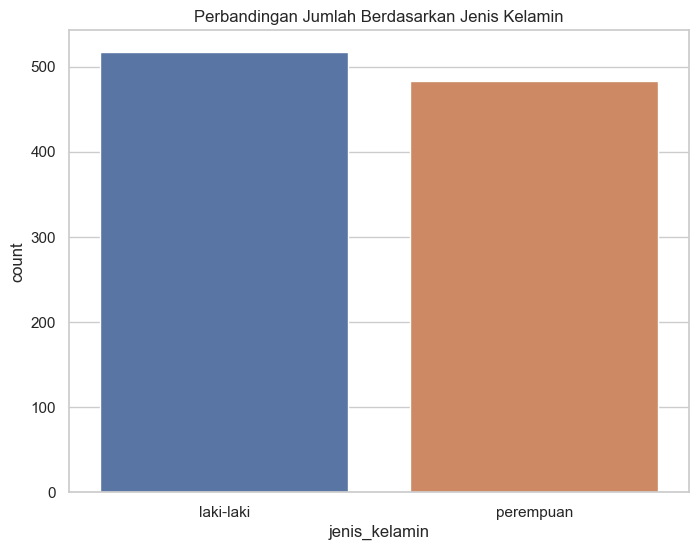

In [9]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(x=df["jenis_kelamin"]).set(title='Jumlah Berdasarkan Jenis Kelamin')
plt.show()

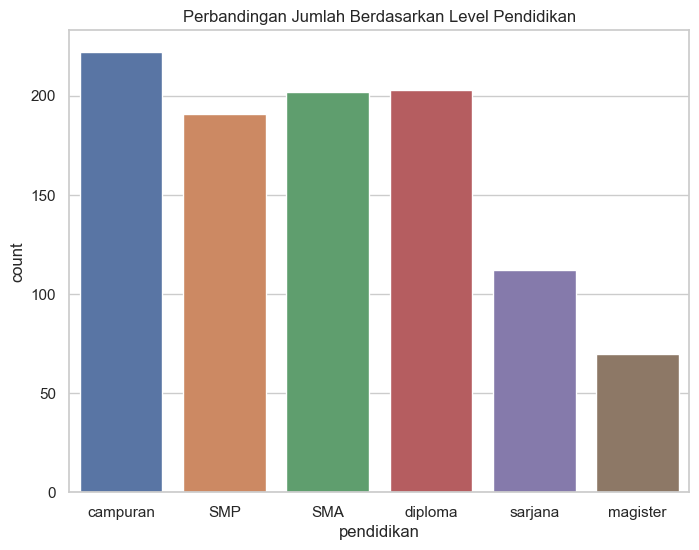

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["pendidikan"]).set(title='Jumlah Berdasarkan Level Pendidikan')
plt.show()

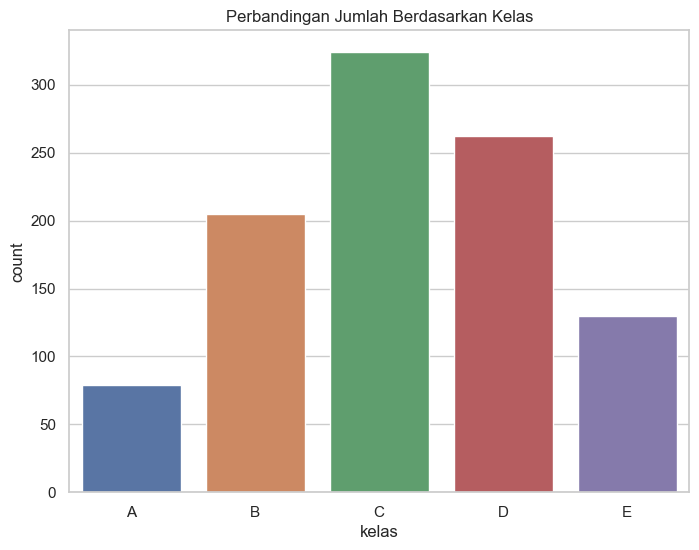

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["kelas"]).set(title='Perbandingan Jumlah Berdasarkan Kelas')
plt.show()

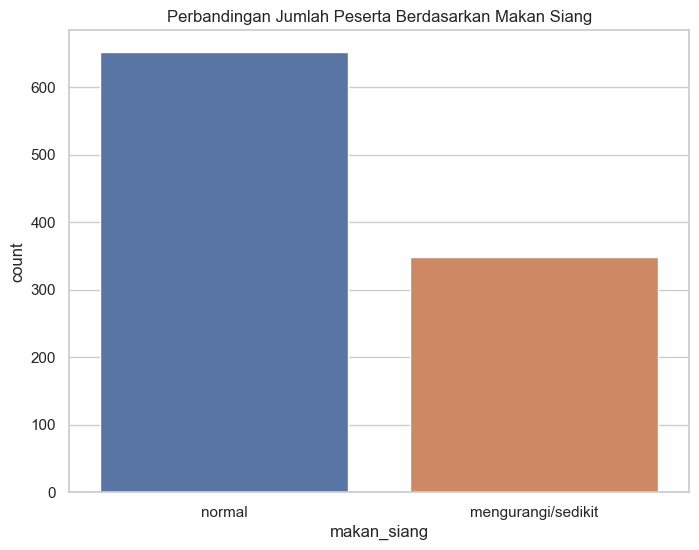

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["makan_siang"]).set(title='Jumlah Peserta Berdasarkan Makan Siang')
plt.show()

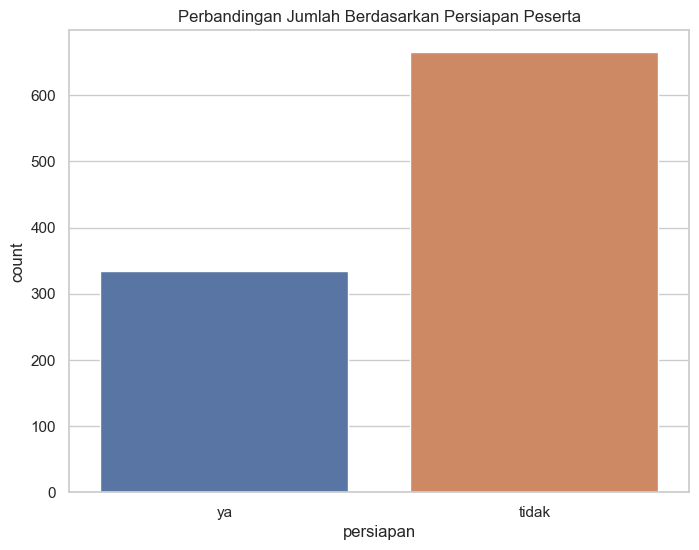

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["persiapan"]).set(title='Jumlah Berdasarkan Persiapan Peserta')
plt.show()

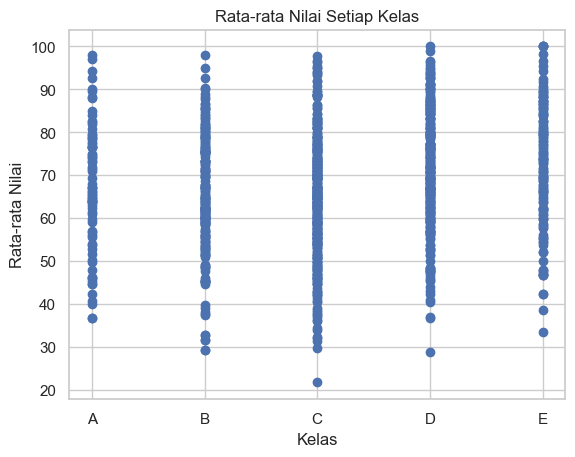

In [28]:
plt.scatter(df['kelas'], df['mean_nilai'])
plt.title('Rata-rata Nilai Setiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Rata-rata Nilai')
plt.show()

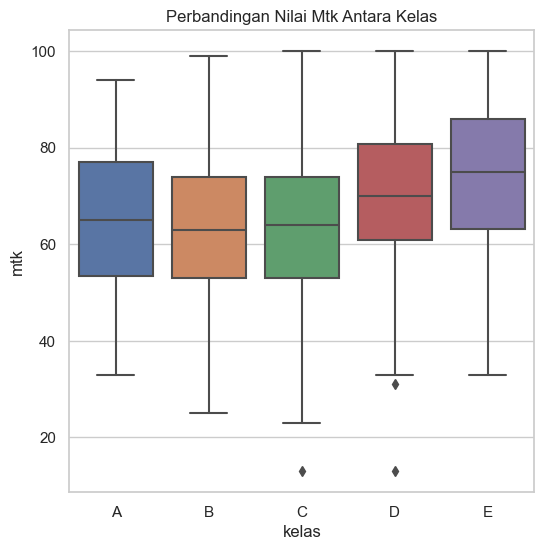

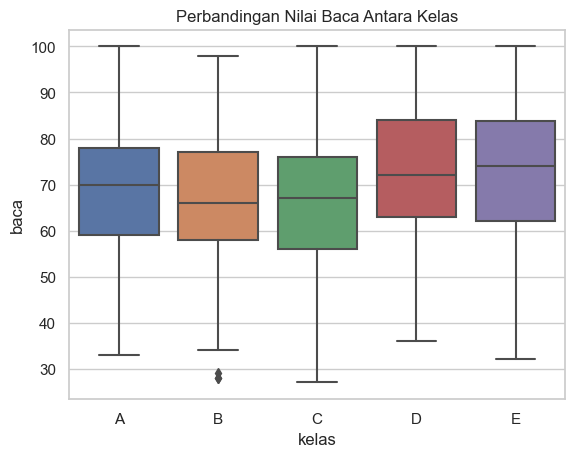

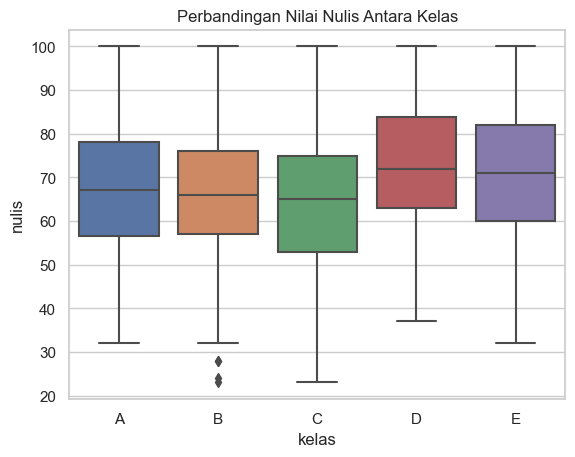

In [15]:
plt.figure(figsize=(6,6))
for nilai in ['mtk', 'baca', 'nulis']:
    sns.boxplot(data=df, x='kelas', y=nilai).set(title=f'Perbandingan Nilai {nilai.capitalize()} Antara Kelas')
    plt.show()

In [16]:
# Kmeans
km=KMeans(n_clusters=4, random_state=0)
km

KMeans(n_clusters=4, random_state=0)

In [17]:
#memprediksi
y_prediksi = km.fit_predict(df[['mtk', 'baca', 'nulis']])
y_prediksi

array([3, 1, 3, 0, 0, 0, 3, 2, 3, 1, 2, 2, 2, 0, 2, 3, 1, 3, 1, 1, 2, 3,
       0, 1, 1, 1, 3, 3, 2, 1, 0, 0, 1, 3, 2, 0, 0, 3, 3, 2, 3, 0, 2, 3,
       2, 1, 3, 0, 0, 3, 3, 3, 0, 1, 3, 3, 0, 2, 1, 3, 0, 3, 3, 0, 2, 3,
       3, 1, 0, 3, 3, 1, 3, 0, 0, 0, 3, 2, 0, 1, 3, 1, 3, 0, 1, 3, 0, 2,
       3, 0, 1, 0, 2, 2, 0, 3, 2, 1, 3, 3, 3, 0, 0, 3, 3, 0, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 0, 3, 3, 3, 2, 3, 2, 3, 1, 0, 3, 0, 1, 2, 2, 0, 3,
       3, 3, 3, 0, 0, 3, 1, 3, 3, 0, 2, 3, 0, 3, 3, 3, 2, 1, 0, 3, 0, 0,
       3, 1, 3, 2, 2, 0, 2, 3, 2, 0, 0, 2, 3, 3, 2, 2, 3, 0, 3, 3, 0, 3,
       3, 1, 2, 2, 3, 1, 2, 0, 2, 2, 0, 3, 3, 3, 3, 1, 3, 2, 3, 1, 1, 3,
       3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 2, 3, 3, 2, 0, 3, 0, 3, 3, 0, 3, 3,
       2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 3, 2, 3, 0, 0, 0,
       3, 3, 1, 0, 1, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 2, 3, 1, 3, 3,
       2, 0, 0, 0, 3, 0, 0, 3, 0, 2, 2, 0, 3, 0, 1, 0, 2, 2, 3, 1, 1, 0,
       2, 1, 0, 3, 0, 0, 3, 0, 3, 2, 1, 3, 3, 1, 1,

In [18]:
#membuat dataframe untuk cluster agar masuk ke dataset
df['cluster'] = y_prediksi
df.head()

,jenis_kelamin,kelas,pendidikan,makan_siang,persiapan,mtk,baca,nulis,mean_nilai,cluster
0,laki-laki,A,campuran,normal,ya,67,67,63,65.67,3
1,perempuan,B,SMP,mengurangi/sedikit,tidak,40,59,55,51.33,1
2,laki-laki,C,SMA,mengurangi/sedikit,tidak,59,60,50,56.33,3
3,laki-laki,D,SMA,normal,tidak,77,78,68,74.33,0
4,laki-laki,E,diploma,normal,ya,78,73,68,73.00,0


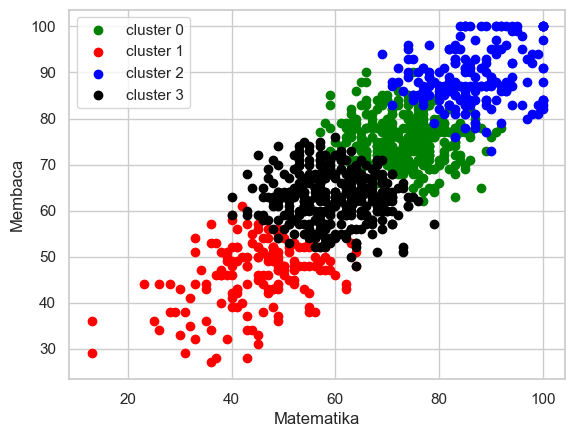

In [19]:
#visualisasi data untuk cluster (kelompok datanya)
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]

plt.scatter(df0.mtk, df0['baca'], color='green', label='cluster 0')
plt.scatter(df1.mtk, df1['baca'], color='red', label='cluster 1')
plt.scatter(df2.mtk, df2['baca'], color='blue', label='cluster 2')
plt.scatter(df3.mtk, df3['baca'], color='black', label='cluster 3')

plt.xlabel('Matematika')
plt.ylabel('Membaca')
plt.legend()
plt.show()

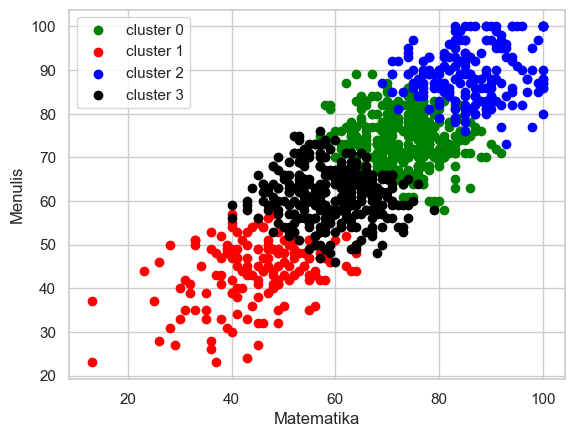

In [20]:
plt.scatter(df0.mtk, df0['nulis'], color='green', label='cluster 0')
plt.scatter(df1.mtk, df1['nulis'], color='red', label='cluster 1')
plt.scatter(df2.mtk, df2['nulis'], color='blue', label='cluster 2')
plt.scatter(df3.mtk, df3['nulis'], color='black', label='cluster 3')

plt.xlabel('Matematika')
plt.ylabel('Menulis')
plt.legend()
plt.show()

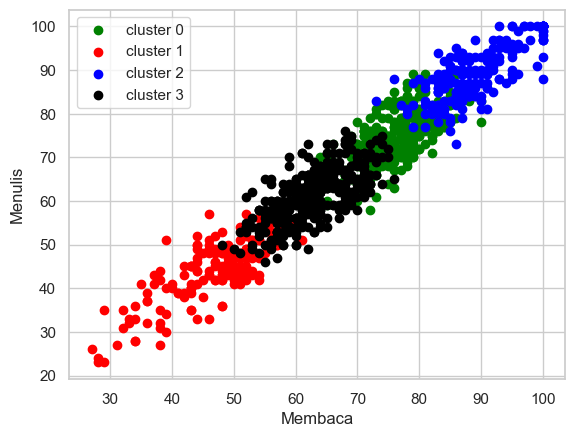

In [21]:
plt.scatter(df0.baca, df0['nulis'], color='green', label='cluster 0')
plt.scatter(df1.baca, df1['nulis'], color='red', label='cluster 1')
plt.scatter(df2.baca, df2['nulis'], color='blue', label='cluster 2')
plt.scatter(df3.baca, df3['nulis'], color='black', label='cluster 3')

plt.xlabel('Membaca')
plt.ylabel('Menulis')
plt.legend()
plt.show()

In [22]:
#melihat grup cluster agar dapat menentukan nilai A, B, C, D
cluster_data = df[['mtk', 'baca', 'nulis']]

kmeans_sel = KMeans(init = 'k-means++', n_clusters=4, n_init=100, random_state=0).fit(cluster_data)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [23]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,mtk,baca,nulis
Cluster,,,
0,59.5,62.9,61.5
1,73.3,75.6,74.2
2,86.3,89.0,89.2
3,44.8,46.2,43.8


In [24]:
#mengganti nama cluster
conditions = [
    (df['cluster'] == 0),
    (df['cluster'] == 1),
    (df['cluster'] == 2),
    (df['cluster'] == 3)
    
]
choices = ['C', 'B','A','D']
df['cluster'] = np.select(conditions, choices)
df

,jenis_kelamin,kelas,pendidikan,makan_siang,persiapan,mtk,baca,nulis,mean_nilai,cluster
0,laki-laki,A,campuran,normal,ya,67,67,63,65.67,D
1,perempuan,B,SMP,mengurangi/sedikit,tidak,40,59,55,51.33,B
2,laki-laki,C,SMA,mengurangi/sedikit,tidak,59,60,50,56.33,D
3,laki-laki,D,SMA,normal,tidak,77,78,68,74.33,C
4,laki-laki,E,diploma,normal,ya,78,73,68,73.00,C
...,...,...,...,...,...,...,...,...,...,...
995,laki-laki,C,SMA,normal,tidak,73,70,65,69.33,C
996,laki-laki,D,diploma,mengurangi/sedikit,ya,85,91,92,89.33,A
997,perempuan,C,SMP,mengurangi/sedikit,tidak,32,35,41,36.00,B
998,perempuan,C,campuran,normal,tidak,73,74,82,76.33,C


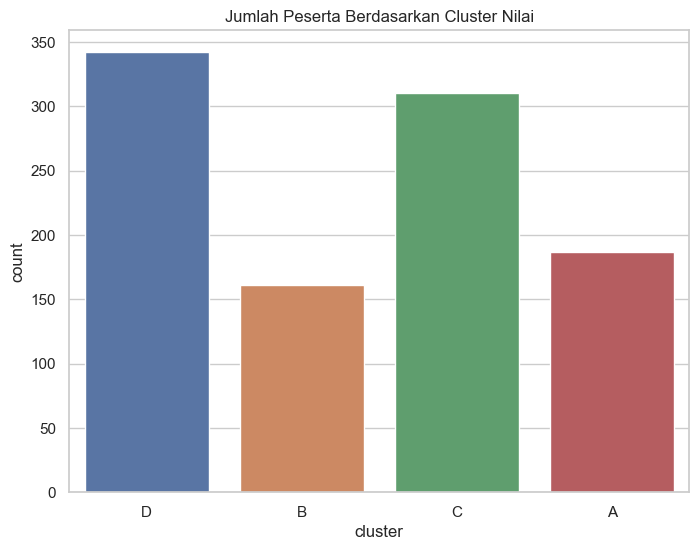

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x=df["cluster"]).set(title='Jumlah Peserta Berdasarkan Cluster Nilai')
plt.show()

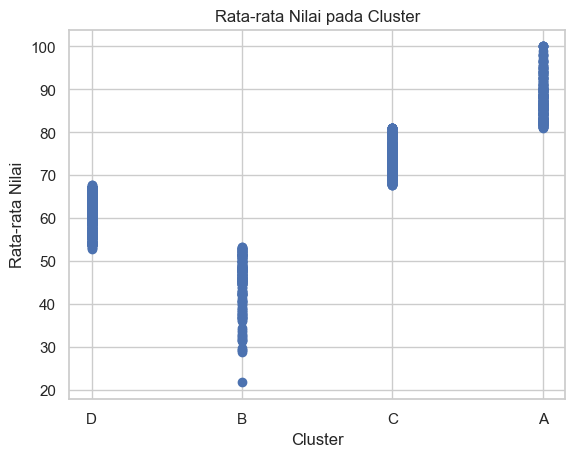

In [27]:
plt.scatter(df['cluster'], df['mean_nilai'])
plt.title('Rata-rata Nilai pada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Nilai')
plt.show()